In [1]:
# You may need to restart your runtime prior to this, to let your installation take effect
# Some basic setup:
# Setup detectron2 logger
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# import some common libraries
import numpy as np
import cv2
import random
from matplotlib import pyplot as plt
%matplotlib inline
"""from cv2 import cv2.imshow"""

# import some common detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import MetadataCatalog

In [2]:
!wget http://images.cocodataset.org/val2017/000000439715.jpg -O input.jpg

--2020-03-02 11:09:09--  http://images.cocodataset.org/val2017/000000439715.jpg
Resolviendo images.cocodataset.org (images.cocodataset.org)... 52.216.140.116
Conectando con images.cocodataset.org (images.cocodataset.org)[52.216.140.116]:80... conectado.
Petición HTTP enviada, esperando respuesta... 200 OK
Longitud: 209222 (204K) [image/jpeg]
Guardando como: “input.jpg”

input.jpg           100%[===================>] 204,32K   599KB/s    en 0,3s    

2020-03-02 11:09:10 (599 KB/s) - “input.jpg” guardado [209222/209222]



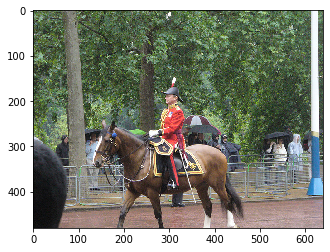

In [3]:
im = cv2.imread("./input.jpg")
im = cv2.cvtColor(im,cv2.COLOR_BGR2RGB)
plt.imshow(im)
plt.show()

In [4]:
cfg = get_cfg()
# add project-specific config (e.g., TensorMask) here if you're not running a model in detectron2's core library
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.5  # set threshold for this model
# Find a model from detectron2's model zoo. You can use the https://dl.fbaipublicfiles... url as well
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)

In [5]:
outputs["instances"].pred_classes
outputs["instances"].pred_boxes

Boxes(tensor([[124.6295, 246.0557, 464.5742, 480.0000],
        [250.5952, 157.1196, 339.5726, 408.2430],
        [ 49.3507, 274.3743,  80.1645, 342.3899],
        [  0.0000, 284.6656,  78.5014, 478.5183],
        [386.0469, 270.9829, 411.8350, 303.1007],
        [334.2235, 251.3125, 414.0236, 277.6147],
        [331.4684, 231.2237, 393.7103, 257.4648],
        [561.0322, 271.5619, 594.9163, 390.1007],
        [512.4011, 276.6875, 563.4662, 389.4290],
        [329.3685, 230.3823, 402.1460, 278.3009],
        [526.8882, 277.4477, 561.6942, 344.5835],
        [114.9140, 268.0703, 145.6501, 397.1750],
        [113.1451, 267.1151, 159.3603, 395.6356]], device='cuda:0'))

# Prueba con modelo ya entrenado
## Detección de animales

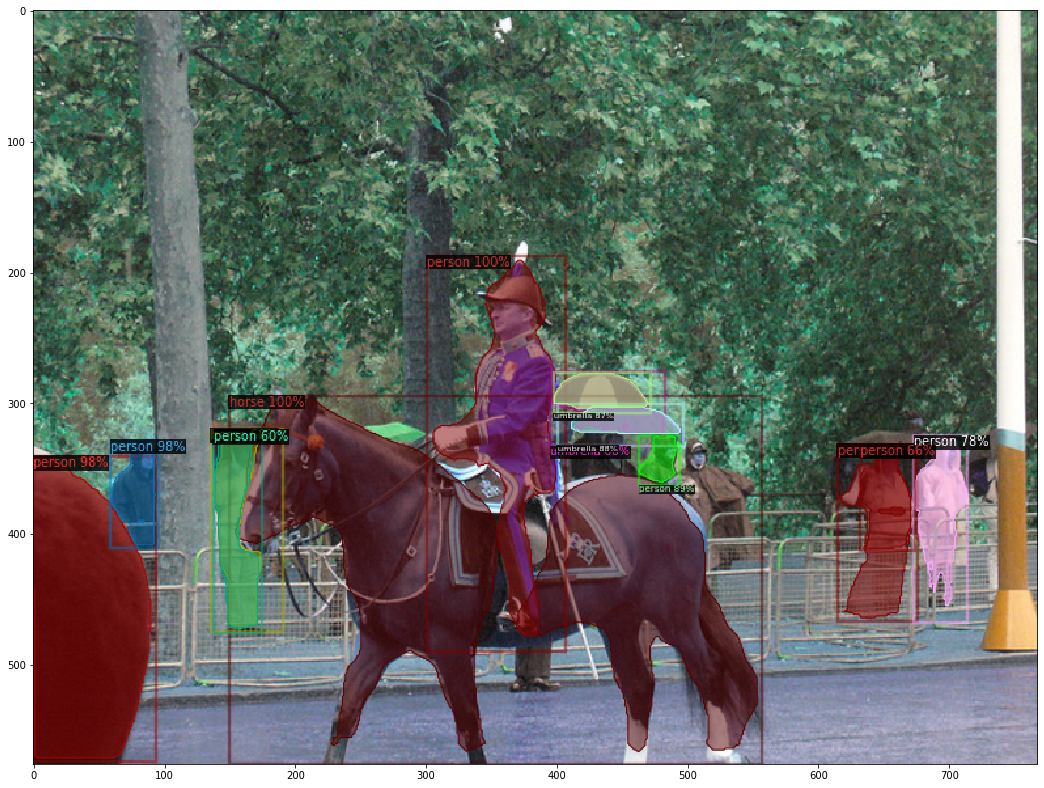

In [10]:
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()

## Detección de la posición

model_final_a6e10b.pkl: 237MB [00:22, 10.5MB/s]                               


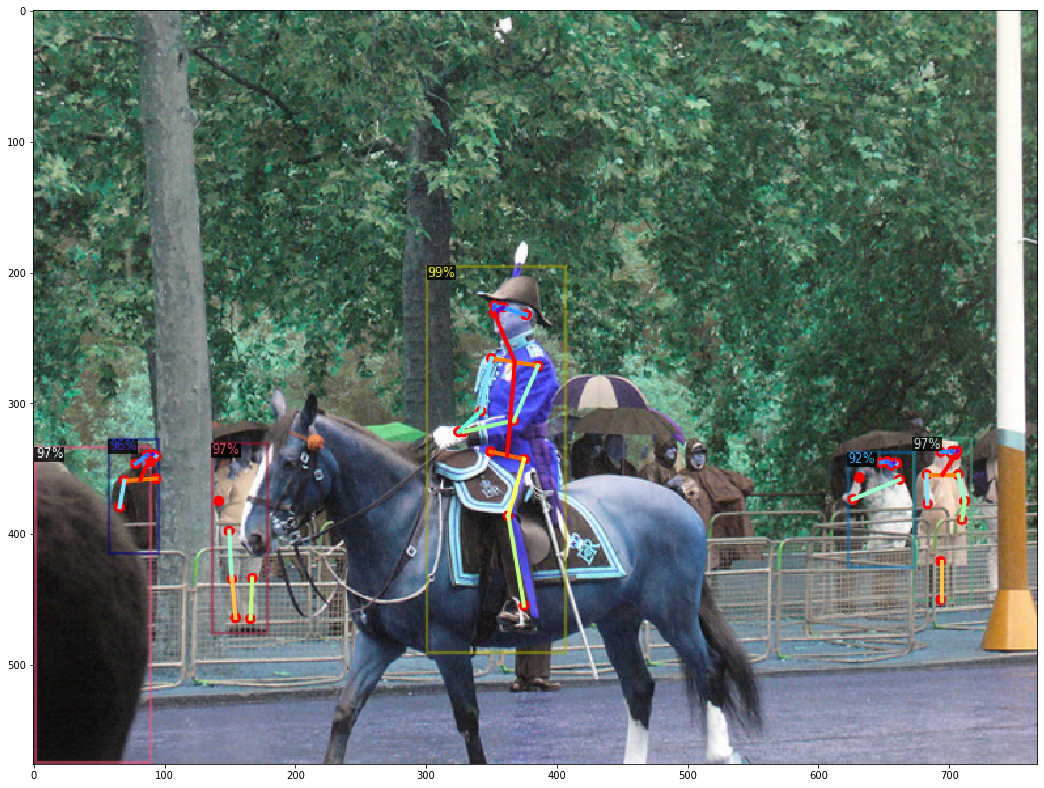

In [11]:
cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml"))
cfg.MODEL.ROI_HEADS.SCORE_THRESH_TEST = 0.7  # set threshold for this model
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-Keypoints/keypoint_rcnn_R_50_FPN_3x.yaml")
predictor = DefaultPredictor(cfg)
outputs = predictor(im)
v = Visualizer(im[:,:,::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
v = v.draw_instance_predictions(outputs["instances"].to("cpu"))
imVisualizer = cv2.cvtColor(v.get_image()[:, :, ::-1],cv2.COLOR_BGR2RGB)
plt.figure(figsize=(18, 16))
plt.imshow(imVisualizer)
plt.show()